# K-Cluster for Gaussian Hotspot Modeling

In [48]:
# Imports

%load_ext autoreload
%autoreload 2

from visualization import plot_gaussian_ellipses, plot_decision_boundaries, plot_decision_boundaries_subplot
from bootstrap_gmm import bootstrap_gmm
from cluster_gaussian_model_class import ClusterGaussianModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


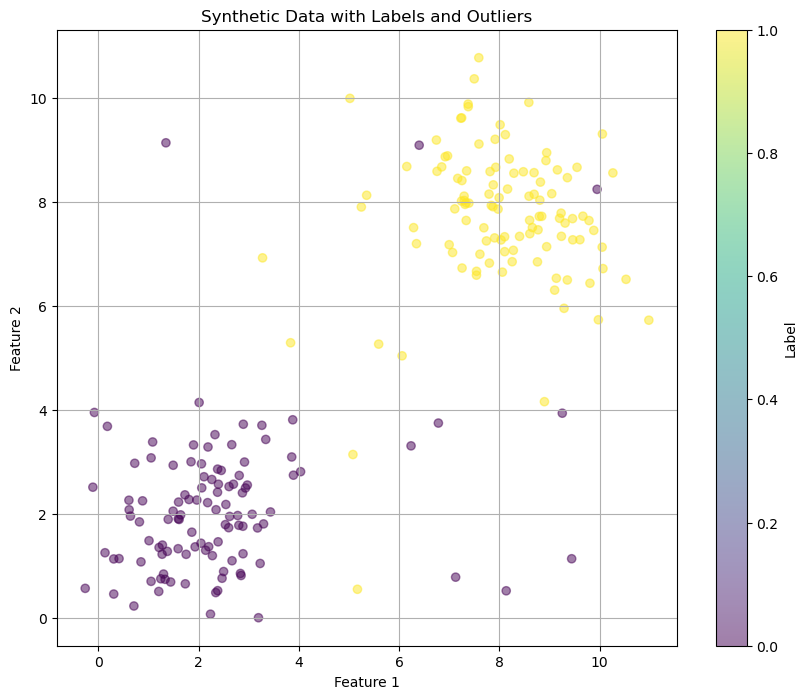

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the clusters
mean1 = [2, 2]
cov1 = [[1, 0.3], [0.3, 1]]  # Slight covariance

mean2 = [8, 8]
cov2 = [[1.2, -0.4], [-0.4, 1.2]]

# Generate the main clusters with labels
data1 = np.random.multivariate_normal(mean1, cov1, 100)
labels1 = np.zeros((100,))  # Label for first cluster

data2 = np.random.multivariate_normal(mean2, cov2, 100)
labels2 = np.ones((100,))  # Label for second cluster

# Generate some outliers
outliers = np.random.uniform(low=[0, 0], high=[10, 10], size=(20, 2))
outlier_labels = np.random.randint(0, 2, 20)  # Randomly label the outliers

# Combine the clusters and outliers
data = np.vstack((data1, data2, outliers))
labels = np.concatenate((labels1, labels2, outlier_labels))

# Plot the data with labels
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, alpha=0.5, cmap='viridis')
plt.title('Synthetic Data with Labels and Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Label')
plt.show()

# Returning the data and labels for your use
# data, labels


### Training Testing Split

In [45]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Outputting the shapes of the splits to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176, 2), (44, 2), (176,), (44,))

### Scale Data

Account for biases and only scale on train data

<Figure size 640x480 with 0 Axes>

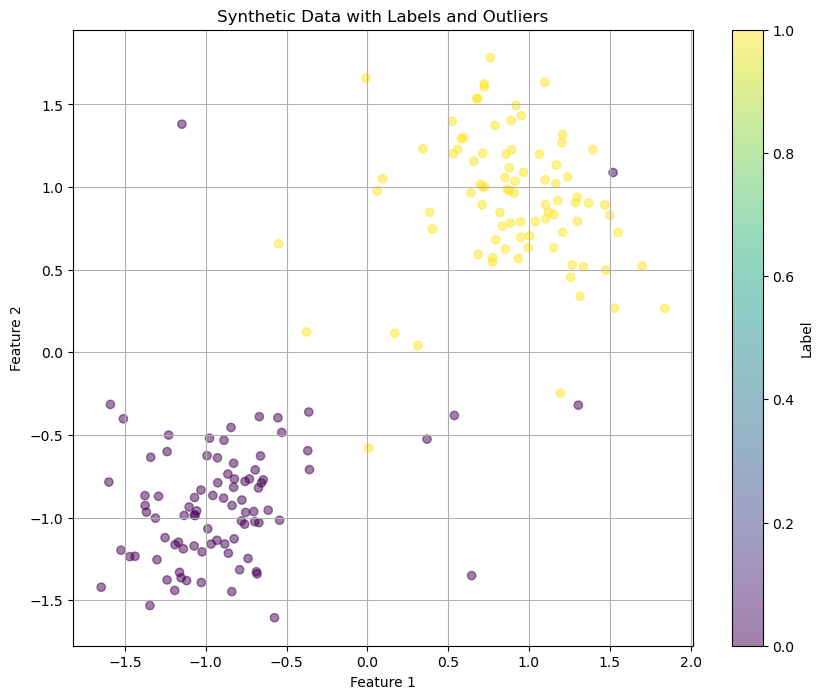

<Figure size 640x480 with 0 Axes>

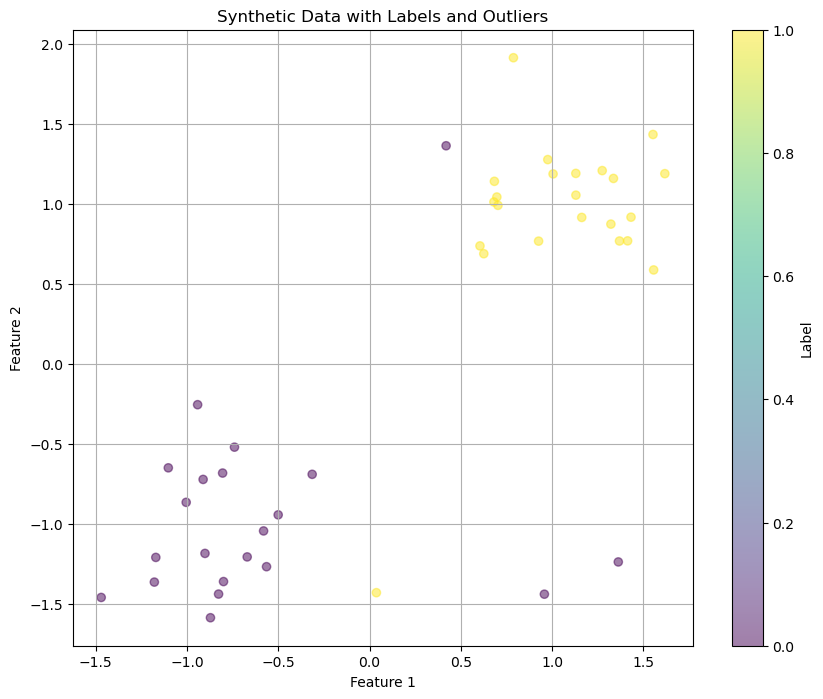

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

plt.clf()
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5, cmap='viridis')
plt.title('Synthetic Data with Labels and Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Label')
plt.show()

plt.clf()
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5, cmap='viridis')
plt.title('Synthetic Data with Labels and Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Label')
plt.show()

### Bootstrap GMM Method

Test on Data (Ignore Class) 

In [44]:
# Assume X is your data matrix with shape (n_samples, n_features)

# Run the bootstrap GMM process
# n_components: Number of mixture components
# n_iterations: Number of bootstrap iterations
# hard: hard stop limit or stop after certain number of nonimproving iterations

# hard = True
best_gmm = bootstrap_gmm(data, n_components=2, n_iterations=1000, hard = True)
print(f"Best GMM Means: {best_gmm.means_}")
print(f"Best GMM Weights: {best_gmm.weights_}")

# hard = False
best_gmm = bootstrap_gmm(data, n_components=2, n_iterations=100, hard = False)
print(f"Best GMM Means: {best_gmm.means_}")
print(f"Best GMM Weights: {best_gmm.weights_}")

Best GMM Means: [[8.02175041 7.57602622]
 [2.06069377 1.98592934]]
Best GMM Weights: [0.52905993 0.47094007]
Best GMM Means: [[2.06081085 1.98590007]
 [8.02175571 7.57615497]]
Best GMM Weights: [0.47094979 0.52905021]


Bootstrap GMM (both hard and soft) was able to find close to the true means of the 2 classes when n_components = 2. 

### Basic Test

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the model with K clusters per label (adjust K as per your requirement)
model = ClusterGaussianModel(K = 4)

# Fit the model on the training data
model.fit(X_train, y_train) 

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}

# If you prefer to display the metrics in a tabular form, you can use pandas DataFrame
import pandas as pd
metrics_df = pd.DataFrame([metrics], index=["ClusterGaussianModel"])

print(metrics_df)

                      Accuracy  Precision  Recall  F1 Score
ClusterGaussianModel  0.931818   0.884615     1.0  0.938776


### Decision Boundary Visualization

#### KCGH

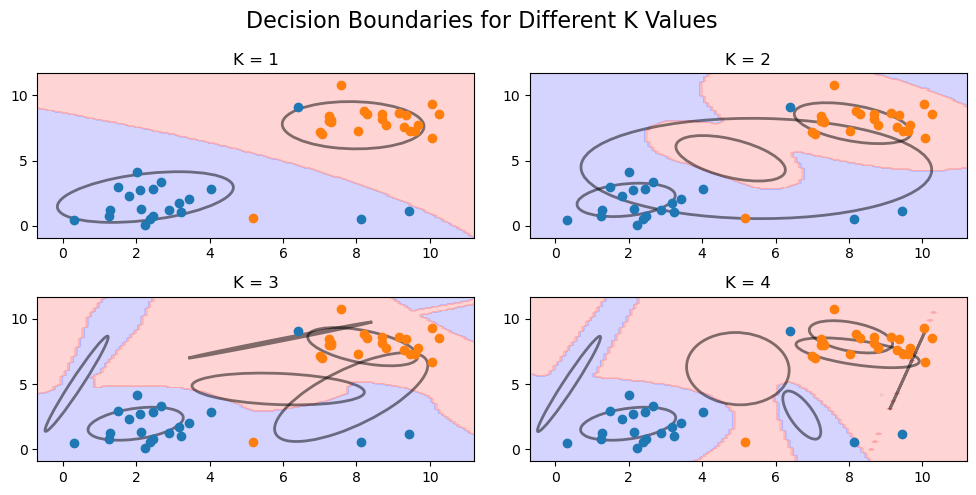

In [49]:
import warnings
warnings.filterwarnings("ignore", message="No data for colormapping provided via 'c'.*")

# Preparing the figure
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle('Decision Boundaries for Different K Values', fontsize=16)

# Loop over K values
for K, ax in zip(range(1, 5), axs.flatten()):
    model = ClusterGaussianModel(K=K)
    model.fit(X_train, y_train)
    plot_decision_boundaries_subplot(X_test, y_test, model, ax)

plt.tight_layout()
plt.show()

#### KNN

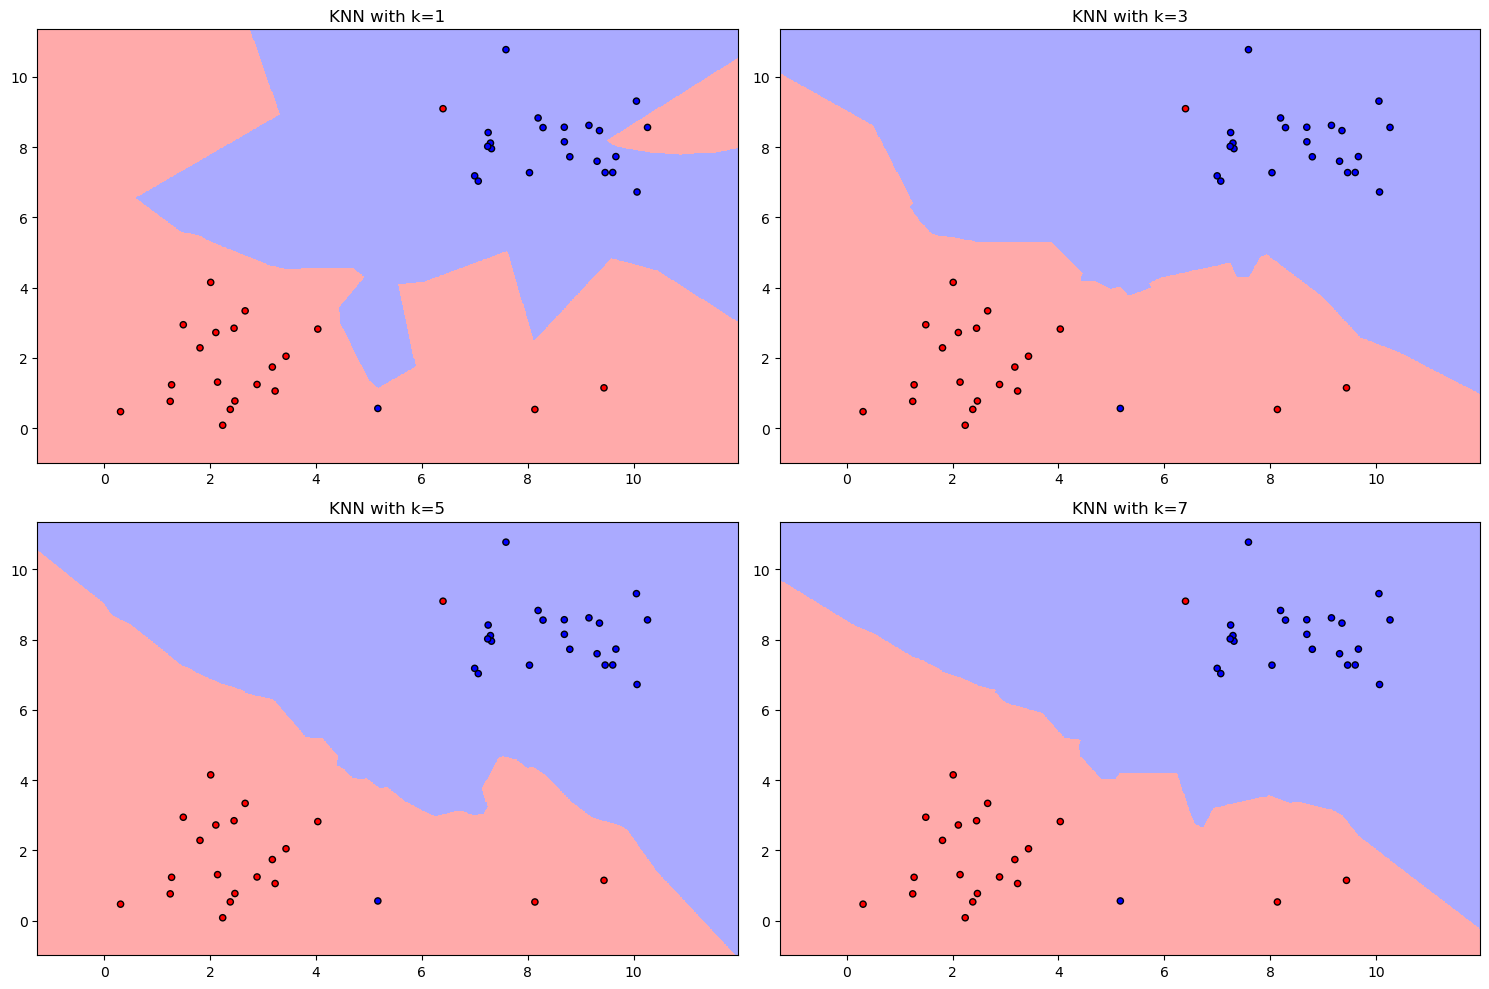

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons

# Define the k values you want to test
k_values = [1, 3, 5, 7]

# Setup color maps for decision boundaries and points
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the array of axes for easy looping
axs = axs.flatten()

# Loop through different values of k
for i, k in enumerate(k_values):
    # Create and fit the model
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Plotting decision boundaries
    # Create a mesh grid
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict classifications for each point in mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the results
    axs[i].contourf(xx, yy, Z, cmap=cmap_light)
    axs[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
    axs[i].set_title(f'KNN with k={k}')

plt.tight_layout()
plt.show()


Larger K creates more complex decision boundary (opposite of KNN). 

Comparing KCGH to KNN reveals interesting results. 
1. The choice of K for KCGH matters much more than choice of K for KNN. 
2. Both rely highly on regularization and normalization, but KCGH relies more on it due to underflow problems with GMM algorithm. 
3. KCGH has much higher train complexity (KNN has none), but KNN has higher test complexity. 
4. KCGH is less susceptible (sensitive) to outliers due to weights. 

## Iris

In [8]:
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Choose Iris-Virginica (label 2) vs. others
y_binary = (y == 2).astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize, fit, and predict with the ClusterGaussianModel
model = ClusterGaussianModel(K = 4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(int)  # Redefine labels for binary classification (Iris-Virginica vs. others)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Initialize and fit the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

# Predict the labels for the test set with each model
knn_predictions = knn_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Calculate and display metrics for each model
models = {'KNN': knn_predictions, 'LR': lr_predictions}
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{model_name} Model Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

# Note: Remember to include the ClusterGaussianModel code and its evaluation here if you haven't already.





Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
KNN Model Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

LR Model Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



Complex Dataset

In [5]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten the images for simplicity
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255

# Convert labels to binary (example: 'airplane' vs. 'not airplane')
y_train_binary = (y_train == 0).astype(int).flatten()
y_test_binary = (y_test == 0).astype(int).flatten()

# Further split the training data for validation if needed
X_train, X_val, y_train, y_val = train_test_split(x_train_flat, y_train_binary, test_size=0.1, random_state=42)


ModuleNotFoundError: No module named 'tensorflow'

Complex Dataset 2.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming ClusterGaussianModel is defined as per your description

# Initialize your custom model, KNN, and LR models
kmhm_model = ClusterGaussianModel(K = 3)  # Adjust K as necessary
knn_model = KNeighborsClassifier(n_neighbors=5)
lr_model = LogisticRegression(max_iter=1000)

# Fit models
# For your custom model, you might need to adjust this part depending on its implementation
# kmhm_model.fit(X_train.todense(), y_train)  # Assuming your model can't handle sparse matrices directly

knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predict on the test set
# y_pred_kmhm = kmhm_model.predict(X_test.todense())  # Convert to dense if your model requires
y_pred_knn = knn_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Display results
# print("ClusterGaussianModel Results:")
# print(classification_report(y_test, y_pred_kmhm))

print("KNN Results:")
print(classification_report(y_test, y_pred_knn))

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

# Assuming X_train, X_test are in sparse format and y_train, y_test are defined as shown before

# Convert sparse matrices to dense for model fitting, if necessary
# X_train_dense = X_train.todense()
# X_test_dense = X_test.todense()

# Initialize your custom model
cluster_gaussian_model = ClusterGaussianModel(K=3)

# Fit the model
# Note: If your model cannot handle sparse matrices directly, use X_train_dense
cluster_gaussian_model.fit(X_train_df, y_train)

# Predict the test set
# Note: Similarly, use X_test_dense if your model requires dense input
y_pred_cluster_gaussian = cluster_gaussian_model.predict(X_test)

# Evaluate the model
print("ClusterGaussianModel Results:")
print(classification_report(y_test, y_pred_cluster_gaussian))



KNN Results:
              precision    recall  f1-score   support

           0       1.00      0.02      0.05       389
           1       0.51      1.00      0.67       394

    accuracy                           0.51       783
   macro avg       0.75      0.51      0.36       783
weighted avg       0.75      0.51      0.36       783

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       389
           1       0.89      0.89      0.89       394

    accuracy                           0.89       783
   macro avg       0.89      0.89      0.89       783
weighted avg       0.89      0.89      0.89       783



In [28]:
import pandas as pd

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train.toarray())

# View the first few rows
X_train_df.describe() 


0            1            2            3            4     \
count  1177.000000  1177.000000  1177.000000  1177.000000  1177.000000   
mean      0.002292     0.002339     0.000346     0.001270     0.000416   
std       0.018877     0.019357     0.008378     0.013507     0.005726   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.323668     0.447962     0.203989     0.249011     0.117416   

              5            6            7            8            9     ...  \
count  1177.000000  1177.000000  1177.000000  1177.000000  1177.000000  ...   
mean      0.000033     0.000173     0.000906     0.000595     0.000167  ...   
std       0.000977     0.004189     0.014323     0.006021     0.005069  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       0.033046     0.101995     0.327493     0.123531     0.172147  ...   

              9990         9991         9992         9993         9994  \
count  1177.000000  1177.000000  1177.000000  1177.000000  1177.000000   
mean      0.000029     0.000655     0.000172     0.000171     0.000094   
std       0.000996     0.016289     0.003437     0.004174     0.002765   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.034186     0.473440     0.100719     0.134612     0.093996   

              9995         9996         9997         9998         9999  
count  1177.000000  1177.000000  1177.000000  1177.000000  1177.000000  
mean      0.000047     0.000041     0.000030     0.000030     0.000080  
std       0.001607     0.001391     0.001033     0.001033     0.002620  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       0.055143     0.047734     0.035440     0.035440     0.089763  

[8 rows x 10000 columns]